Q1)How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

MULTIPLICATION:  n*k*m
To compute each element in the resulting matrix C, we perform k multiplications for a total of k operations. As there are n * m elements in the resulting matrix C, we do n * m * k multiplications.

ADDITION: n*m*(k-1)
To compute each element in the resulting matrix C, we perform k multiplications for a total of k operations. As there are n * m elements in the resulting matrix C, we do  n * m * (k - 1) additions.

In total we do n * m * (2k - 1) operations.

Q2)Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [163]:
2.
#Using List of Lists
def matrix_multiply(a, b):
    result = [[0 for _ in range(len(b[0]))] for _ in range(len(a))]
    
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k] * b[k][j]
                
    return result
    
n, k, m = 3, 4, 2
matrix_a = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix_b = [[9, 8], [7, 6], [5, 4]]

result_list_of_lists = matrix_multiply(matrix_a, matrix_b)
print(result_list_of_lists)

[[38, 32], [101, 86], [164, 140]]


In [164]:
2.
#Using NumPy
import numpy as np

n, k, m = 3, 4, 2
matrix_a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix_b = np.array([[9, 8], [7, 6], [5, 4]])

result_numpy = np.dot(matrix_a, matrix_b)
print(result_numpy)

[[ 38  32]
 [101  86]
 [164 140]]


In [165]:
2.
#Timing
import timeit

n, k, m = 3, 4, 2
matrix_a = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix_b = [[9, 8], [7, 6], [5, 4]]
matrix_a_np = np.array(matrix_a)
matrix_b_np = np.array(matrix_b)

# Timing using List of lists
time_list_of_lists = timeit.timeit(lambda: matrix_multiply(matrix_a, matrix_b), number=10000)

# Timing using NumPy
time_numpy = timeit.timeit(lambda: np.dot(matrix_a_np, matrix_b_np), number=10000)

print(f"Time using List of lists: {time_list_of_lists:.6f} seconds")
print(f"Time using NumPy: {time_numpy:.6f} seconds")


Time using List of lists: 0.365409 seconds
Time using NumPy: 0.212943 seconds


NumPy is faster than List of lists.
 NumPy has the main aim to reduce or remove the explicit use of for loops in the program by which computation becomes faster. 

Q3)Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [166]:
3.
import numpy as np
import time

def find_median1(arr):
    temp1=0
    temp2=0
    maxm=0
    times=int(len(arr)/2) + 1
    for i in range(times):
        max_index=0
        temp2=maxm
        maxm=arr[0]
        for j in range(len(arr)):
            if(arr[j] > maxm):
                maxm=arr[j]
                max_index=j
            temp1=maxm
        arr = np.delete(arr, max_index)

    if(len(arr)%2==1):
        return temp1
    else:
        return (temp1+temp2)*0.5
    
def find_median2(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)

    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        middle1 = sorted_arr[n // 2 - 1]
        middle2 = sorted_arr[n // 2]
        return (middle1 + middle2) / 2

arr = np.random.rand(10**3)

start_time = time.time()
median_passes = find_median1(arr.copy())
end_time = time.time()
print(f"Time taken for inefficient method: {end_time - start_time} seconds")

start_time = time.time()
median_quickselect = find_median2(arr.copy())
end_time = time.time()
print(f"Time taken for efficient method (QuickSelect): {end_time - start_time} seconds")

start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
print(f"Time taken for NumPy median: {end_time - start_time} seconds")

Time taken for inefficient method: 0.45678067207336426 seconds
Time taken for efficient method (QuickSelect): 0.0025610923767089844 seconds
Time taken for NumPy median: 0.002926349639892578 seconds


Q4)What is the gradient of the following function with respect to x and y?

Partial derivative with respect to x: 2xy + y^3 * cos(x)

Partial derivative with respect to y: x^2 + 3y^2 * sin(x)

Gradient f(x,y) = (2xy + y^3 * cos(x))i + (x^2 +3 * y^2 * sin(x))j

Q5)Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [167]:
5.
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))

x_val = 1.5
y_val = 2.0

analytical_gradient = jnp.array([2*x_val*y_val + y_val**3 * jnp.cos(x_val), x_val**2 + 3*y_val**2 * jnp.sin(x_val)])
jax_gradient = grad_f(x_val, y_val)

print("Analytical Gradient:", analytical_gradient)
print("JAX Gradient:", jax_gradient)

Analytical Gradient: [ 6.5658975 14.21994  ]
JAX Gradient: (Array(6.5658975, dtype=float32, weak_type=True), Array(14.21994, dtype=float32, weak_type=True))


Q6)Use sympy to confirm that you obtain the same gradient analytically.

In [168]:
6. 
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

analytical_gradient_sympy = sp.Matrix([df_dx, df_dy])
print("Analytical Gradient (SymPy):", analytical_gradient_sympy)

x_val = 1.5
y_val = 2.0

analytical_gradient_values = analytical_gradient_sympy.subs({x: x_val, y: y_val})
print("Analytical Gradient Values:", analytical_gradient_values)

Analytical Gradient (SymPy): Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])
Analytical Gradient Values: Matrix([[6.56589761334162], [14.2199398392487]])


Q7)Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [169]:
7.
student_records = {
    2022: {
        'Branch 1': {
            'S1':{
                'Roll Number': 1,
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70  
                }
            }
        },
        'Branch 2': {
            # Add student records for Branch 2 in 2022 
        }
    },
    2023: {
        'Branch 1': {
            # Add student records for Branch 1 in 2023
        },
        'Branch 2': {
            # Add student records for Branch 2 in 2023
        }
    },
    2024: {
        'Branch 1': {
            # Add student records for Branch 1 in 2024
        },
        'Branch 2': {
            # Add student records for Branch 2 in 2024
        }
    },
    2025: {
        'Branch 1': {
            # Add student records for Branch 1 in 2025
        },
        'Branch 2': {
            # Add student records for Branch 2 in 2025
        }
    }
}

print("Sample Information:")
print("Year: 2022, Branch: Branch 1, S1 detail:", student_records[2022]['Branch 1']['S1'])
print("Year: 2022, Branch: Branch 1, S1, Marks:", student_records[2022]['Branch 1']['S1']['Marks'])

Sample Information:
Year: 2022, Branch: Branch 1, S1 detail: {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
Year: 2022, Branch: Branch 1, S1, Marks: {'Maths': 100, 'English': 70}


Q8)Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [170]:
8.
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

year_objects = []

year_2022 = Year(2022)

branch_1_2022 = Branch('Branch 1')
student_1_2022 = Student(1, 'N', {'Maths': 100, 'English': 70})

branch_1_2022.add_student(student_1_2022)
year_2022.add_branch(branch_1_2022)
year_objects.append(year_2022)

print("Sample Information:")
print("Year: 2022, Branch: Branch 1, Student details:", year_objects[0].branches[0].students[0].__dict__)
print("Year: 2022, Branch: Branch 1, Student no: 1, Marks:", year_objects[0].branches[0].students[0].marks)

Sample Information:
Year: 2022, Branch: Branch 1, Student details: {'roll_number': 1, 'name': 'N', 'marks': {'Maths': 100, 'English': 70}}
Year: 2022, Branch: Branch 1, Student no: 1, Marks: {'Maths': 100, 'English': 70}


Q9)Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

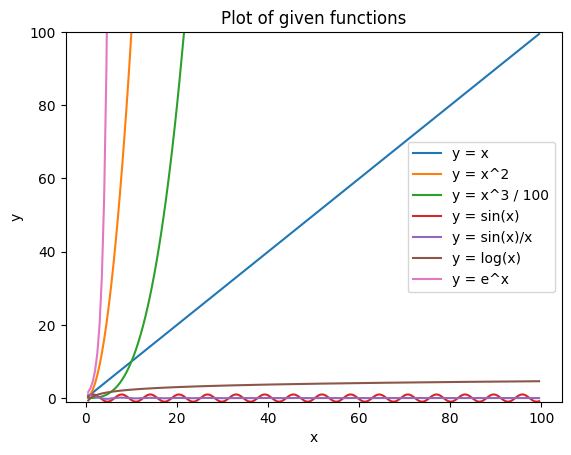

In [171]:
9.
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100.0, 0.5)

y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

plt.plot(x_values, y1, label='y = x')

plt.plot(x_values, y2, label='y = x^2')

plt.plot(x_values, y3, label='y = x^3 / 100')

plt.plot(x_values, y4, label='y = sin(x)')

plt.plot(x_values, y5, label='y = sin(x)/x')

plt.plot(x_values, y6, label='y = log(x)')

plt.plot(x_values, y7, label='y = e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of given functions')
plt.legend()

plt.ylim(-1, 100)
plt.show()


Q10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [172]:
10.
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

highest_std_column = df.std().idxmax()

lowest_mean_row = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)
print("\nColumn with Highest Standard Deviation:", highest_std_column)
print("Row with Lowest Mean:", lowest_mean_row)

DataFrame:
           a         b         c         d         e
0   1.396507  1.953717  1.180079  1.303296  1.487185
1   1.160106  1.994771  1.546099  1.823023  1.116919
2   1.097713  1.837977  1.106635  1.513558  1.315333
3   1.364401  1.724618  1.138080  1.777415  1.821617
4   1.410075  1.814499  1.493804  1.253472  1.450916
5   1.792126  1.622271  1.340636  1.431455  1.576012
6   1.439162  1.325358  1.606872  1.952081  1.971247
7   1.045371  1.030700  1.741831  1.595559  1.508977
8   1.806297  1.906193  1.471736  1.584824  1.478370
9   1.569950  1.134059  1.272815  1.224124  1.059500
10  1.691001  1.805665  1.093698  1.896397  1.420693
11  1.101543  1.817949  1.205468  1.594617  1.472151
12  1.195406  1.940759  1.733980  1.040264  1.000318
13  1.166631  1.456750  1.580195  1.721164  1.397822
14  1.485500  1.246983  1.468615  1.735309  1.400114
15  1.972740  1.520555  1.397830  1.848785  1.720761
16  1.197774  1.941492  1.561555  1.733437  1.500225
17  1.607075  1.681918  1.293199  1

Q11)Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [173]:
11.
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_lt8_rows = len(df[df['g'] == 'LT8'])

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("DataFrame:")
print(df)

print("\nNumber of rows where the value in column 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of column 'f' where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' where 'g' is 'GT8':", std_gt8)

DataFrame:
           a         b         c         d         e         f    g
0   1.529020  1.684899  1.412943  1.684647  1.562550  7.874060  LT8
1   1.189135  1.246470  1.189600  1.494924  1.997450  7.117578  LT8
2   1.249594  1.012305  1.328979  1.580442  1.156053  6.327373  LT8
3   1.083245  1.283875  1.559551  1.141222  1.500663  6.568557  LT8
4   1.054140  1.196338  1.121494  1.459801  1.451919  6.283692  LT8
5   1.135672  1.609325  1.531631  1.754880  1.270590  7.302099  LT8
6   1.893177  1.556490  1.516174  1.414326  1.652017  8.032186  GT8
7   1.335969  1.761644  1.190297  1.841017  1.477750  7.606678  LT8
8   1.840997  1.105123  1.140958  1.645965  1.668570  7.401613  LT8
9   1.283317  1.281051  1.572838  1.351782  1.747968  7.236955  LT8
10  1.995053  1.856864  1.786177  1.238198  1.781588  8.657880  GT8
11  1.994416  1.651637  1.902054  1.577657  1.314688  8.440451  GT8
12  1.767141  1.455712  1.837295  1.586124  1.079946  7.726218  LT8
13  1.745598  1.978429  1.908687  1.6

Q12)Write a small piece of code to explain broadcasting in numpy.

In [174]:
12.
import numpy as np

a = np.array([1, 2, 3])
b = 2

result = a + b

print("Array a:", a)
print("Scalar b:", b)
print("Result after broadcasting:", result)

Array a: [1 2 3]
Scalar b: 2
Result after broadcasting: [3 4 5]


Q13)Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [175]:
13.
import numpy as np

def custom_argmin(arr):
    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

array_to_check = np.array([4, 3, 9, 2, 3, 6])

result_custom = custom_argmin(array_to_check)

result_np = np.argmin(array_to_check)

print("Custom argmin result:", result_custom)
print("np.argmin result:", result_np)

assert result_custom == result_np, "Results do not match."

Custom argmin result: 3
np.argmin result: 3
